In [17]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from test_fonts import *
from NeuralNetwork import  *
from time import perf_counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Dataset

In [3]:
fonts = get_all_fonts(1,True)
font_count = len(fonts)
font_count

32

## Creating Autoencoder

In [4]:
beta = 0.5

sigmoid = lambda e: 1 / (1 + np.exp(-e * 2 * beta))
sigmoid_derived = lambda e: 2 * beta * sigmoid(e) * (1 - sigmoid(e))

tanh = lambda e: math.tanh(e)
tanh_derived = lambda  e: 1- math.tanh(e)**2



def activation(e):
    return tanh(e)

def derivative(e):
    return tanh_derived(e)




## Generating training dataset

In [ ]:
errors = []
for i in range(20):
    print(f'\n {i}:')
    nn = NNBuilder\
        .with_input(7*5)\
        .with_hidden_layer(20,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(2,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(20,activation,derivative)\
        .with_output_layer(7*5,activation,derivative)
    np.random.shuffle(fonts)
    idx = math.floor(font_count * 0.5)
    idx=5
    training, test = np.array(fonts[:idx]), np.array(fonts[idx:])

    t0 = perf_counter()
    training_errors, ws = nn.train_on_dataset(training, training, 10)
    tf = perf_counter()
    print(f'execution time: {tf-t0} s')
    print(f"training error: {training_errors}")
    errors.append(training_errors)


 0:
execution time: 184.4201991000009 s
training error: 0.11606717213192384

 1:
execution time: 161.542056100001 s
training error: 0.14428538029378674

 2:
execution time: 182.11345719999917 s
training error: 0.03328621778463448

 3:
execution time: 203.0589820999994 s
training error: 0.10691792725349768

 4:


In [82]:
print(f'errors: {errors}')
print(f'avg: {np.average(errors)}')
print(f'min: {np.min(errors)}')
print(f'max: {np.max(errors)}')

errors: [0.088960479086753, 0.09677025041316718, 0.1121517875243648, 0.05738415788116297, 0.12934554474838628, 0.14243036079137697, 0.07117422934113458, 0.08080284171318873, 0.070248552212009, 0.07147187915622143, 0.2180181771802756, 0.17054099329844363, 0.10496709718993125, 0.16936259606408402, 0.24790226981378802, 0.07105783863736911, 0.08408701966071441, 0.04927955453621367, 0.17451841627644554, 0.05981015447799362]
avg: 0.11351421000015119
min: 0.04927955453621367
max: 0.24790226981378802


In [75]:
# para agregar seguir iterando sin resetear la red (a chequear)
t0 = perf_counter()
training_errors, ws = nn.train_on_dataset(training, training, 5)
tf = perf_counter()
print(f'execution time: {tf-t0} s')
print(f"training error: {training_errors}")
# print(f"testing error: {nn.get_error_on_dataset(test, test)}")

ITERATION 26
ITERATION 27
ITERATION 28
ITERATION 29
ITERATION 30
execution time: 89.5714681999998 s
training error: 0.06388125639789648


None
None
None
None
None


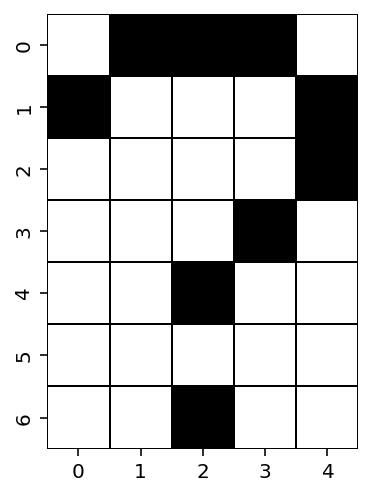

In [76]:
for t in training:
    aa = t
    value = nn.feed_forward(aa)

    print(print_character(aa.reshape(7,5)))

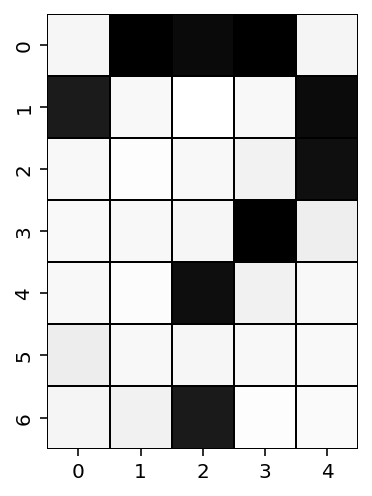

In [77]:
print_character(value.reshape(7,5))